Importing libraries

In [ ]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt

Downloading 'punkt', 'stopwords', 'wordnet' and 'vader_lexicon' package from nltk library.

In [ ]:
nltk.download('punkt')
# for using word_tokenize() function

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Importing a text file containing tweets.

In [ ]:
text = open("/content/tweet_for_analysis.txt", encoding = 'utf-8').read()

Before analysing we need to clean the data i.e. converting the data into a set of meaningful words that can be analysis to estimate the sentiment. We will perform the following steps -

***1. Converting the text into lowercase***


In [ ]:
lower_case = text.lower()

***2. Removing punctuations.***

In [ ]:
cleaned_text = lower_case.translate(str.maketrans('','',string.punctuation))
cleaned_text

'switchfoot httptwitpiccom2y1zl  awww thats a bummer  you shoulda got david carr of third day to do it d\nis upset that he cant update his facebook by texting it and might cry as a result  school today also blah\nkenichan i dived many times for the ball managed to save 50  the rest go out of bounds\nmy whole body feels itchy and like its on fire \nnationwideclass no its not behaving at all im mad why am i here because i cant see you all over there \nkwesidei not the whole crew \nneed a hug \nloltrish hey  long time no see yes rains a bit only a bit  lol  im fine thanks  hows you \ntatianak nope they didnt have it \ntwittera que me muera  \nspring break in plain city its snowing \ni just repierced my ears \ncaregiving i couldnt bear to watch it  and i thought the ua loss was embarrassing     \noctolinz16 it it counts idk why i did either you never talk to me anymore \nsmarrison i wouldve been the first but i didnt have a gun    not really though zac snyders just a doucheclown\niamjazzyf

***3. Tokenization*** - splitting a phrase, sentence, paragraph, one or multiple text into smaller units.
Each of these smaller units are referred as a token. These token can be anything a word, subword or even a character. In our case it is a word, number, slang, abbreviation, etc.

In [ ]:
tokenized_word = word_tokenize(cleaned_text, 'english')
tokenized_word

['switchfoot',
 'httptwitpiccom2y1zl',
 'awww',
 'thats',
 'a',
 'bummer',
 'you',
 'shoulda',
 'got',
 'david',
 'carr',
 'of',
 'third',
 'day',
 'to',
 'do',
 'it',
 'd',
 'is',
 'upset',
 'that',
 'he',
 'cant',
 'update',
 'his',
 'facebook',
 'by',
 'texting',
 'it',
 'and',
 'might',
 'cry',
 'as',
 'a',
 'result',
 'school',
 'today',
 'also',
 'blah',
 'kenichan',
 'i',
 'dived',
 'many',
 'times',
 'for',
 'the',
 'ball',
 'managed',
 'to',
 'save',
 '50',
 'the',
 'rest',
 'go',
 'out',
 'of',
 'bounds',
 'my',
 'whole',
 'body',
 'feels',
 'itchy',
 'and',
 'like',
 'its',
 'on',
 'fire',
 'nationwideclass',
 'no',
 'its',
 'not',
 'behaving',
 'at',
 'all',
 'im',
 'mad',
 'why',
 'am',
 'i',
 'here',
 'because',
 'i',
 'cant',
 'see',
 'you',
 'all',
 'over',
 'there',
 'kwesidei',
 'not',
 'the',
 'whole',
 'crew',
 'need',
 'a',
 'hug',
 'loltrish',
 'hey',
 'long',
 'time',
 'no',
 'see',
 'yes',
 'rains',
 'a',
 'bit',
 'only',
 'a',
 'bit',
 'lol',
 'im',
 'fine',
 '

***4. Removing Stopwords***

Words in a sentence that doesn't add meaning to the sentence are referred as stopwords. For example - I, at, they, was, is ,etc.
We need to filter out the stopwords before processing our text for sentiments since they are insifnificant.

We have used stopwords.words() which contains a list of stopwords to filtered out meaningful words from entire text.




In [ ]:
resulted_words = []
for word in tokenized_word:
  if word not in stopwords.words('english'):
    resulted_words.append(word)

resulted_words

['switchfoot',
 'httptwitpiccom2y1zl',
 'awww',
 'thats',
 'bummer',
 'shoulda',
 'got',
 'david',
 'carr',
 'third',
 'day',
 'upset',
 'cant',
 'update',
 'facebook',
 'texting',
 'might',
 'cry',
 'result',
 'school',
 'today',
 'also',
 'blah',
 'kenichan',
 'dived',
 'many',
 'times',
 'ball',
 'managed',
 'save',
 '50',
 'rest',
 'go',
 'bounds',
 'whole',
 'body',
 'feels',
 'itchy',
 'like',
 'fire',
 'nationwideclass',
 'behaving',
 'im',
 'mad',
 'cant',
 'see',
 'kwesidei',
 'whole',
 'crew',
 'need',
 'hug',
 'loltrish',
 'hey',
 'long',
 'time',
 'see',
 'yes',
 'rains',
 'bit',
 'bit',
 'lol',
 'im',
 'fine',
 'thanks',
 'hows',
 'tatianak',
 'nope',
 'didnt',
 'twittera',
 'que',
 'muera',
 'spring',
 'break',
 'plain',
 'city',
 'snowing',
 'repierced',
 'ears',
 'caregiving',
 'couldnt',
 'bear',
 'watch',
 'thought',
 'ua',
 'loss',
 'embarrassing',
 'octolinz16',
 'counts',
 'idk',
 'either',
 'never',
 'talk',
 'anymore',
 'smarrison',
 'wouldve',
 'first',
 'didnt'

***Generating the polarity scores to see whether the overall text contains a positive, negative or neutral sentiment.***

The score will always lie bbetween 0 and 1.

In [ ]:
def sent_analysis(sentiment_text):
  score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
  neg = score['neg']
  pos = score ['pos']

  print(score)

 # if neg > pos:
 #   print("Negative Sentiment")
 # elif pos > neg:
 #   print("Positive Sentiment")
 # else :
 #   print("Neutral")

sent_analysis(cleaned_text)

{'neg': 0.181, 'neu': 0.684, 'pos': 0.135, 'compound': -1.0}


***Importing 'emotions.txt' file and creating a list of emotions present in our text.***

In [ ]:
emotion_list = []
with open('/content/emotions.txt', 'r') as file_emotion:
  for line in file_emotion:
    clear_line = line.replace('\n','').replace(',', '').replace("'", '').strip()
    word, emotions = clear_line.split(":")
    
    if word in resulted_words:
      emotion_list.append(emotions)

emotion_list

[' attracted',
 ' angry',
 ' esteemed',
 ' powerless',
 ' bored',
 ' happy',
 ' fearless',
 ' fearful',
 ' happy',
 ' surprise',
 ' attracted',
 ' angry',
 ' sad',
 ' sad',
 ' demoralized',
 ' angry',
 ' fearful',
 ' happy',
 ' ecstatic',
 ' focused',
 ' cheated',
 ' free',
 ' angry',
 ' angry',
 ' happy',
 ' sad',
 ' happy',
 ' sad',
 ' happy',
 ' fearful',
 ' sad',
 ' happy',
 ' apathetic',
 ' alone',
 ' alone',
 ' lost',
 ' attached',
 ' happy',
 ' angry',
 ' attracted',
 ' safe',
 ' sad',
 ' fearful',
 ' surprise',
 ' independent',
 ' surprise',
 ' anxious',
 ' anxious',
 ' fearful',
 ' happy',
 ' attached',
 ' hated',
 ' fearful',
 ' fearful',
 ' codependent',
 ' fearful',
 ' alone',
 ' embarrassed',
 ' adequate',
 ' happy',
 ' hated',
 ' loved',
 ' attracted',
 ' happy',
 ' fearful',
 ' sad']

***Creating a dictionary which contains the count of every emotion present in the text.***

In [ ]:
emotion_count = Counter(emotion_list)
emotion_count

Counter({' attracted': 4,
         ' angry': 6,
         ' esteemed': 1,
         ' powerless': 1,
         ' bored': 1,
         ' happy': 11,
         ' fearless': 1,
         ' fearful': 9,
         ' surprise': 3,
         ' sad': 7,
         ' demoralized': 1,
         ' ecstatic': 1,
         ' focused': 1,
         ' cheated': 1,
         ' free': 1,
         ' apathetic': 1,
         ' alone': 3,
         ' lost': 1,
         ' attached': 2,
         ' safe': 1,
         ' independent': 1,
         ' anxious': 2,
         ' hated': 2,
         ' codependent': 1,
         ' embarrassed': 1,
         ' adequate': 1,
         ' loved': 1})

***Visualizing the emotion count***

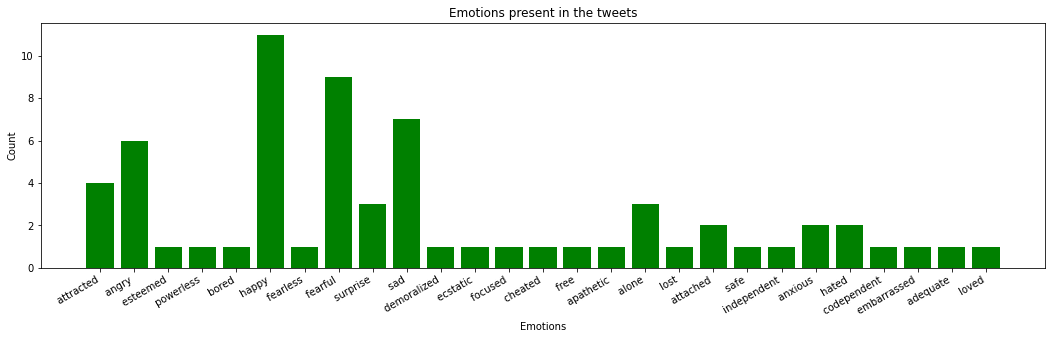

In [ ]:
fig, ax1 = plt.subplots(figsize = (18,5))
ax1.bar(emotion_count.keys(), emotion_count.values(), color = 'g')
fig.autofmt_xdate()
plt.ylabel("Count")
plt.xlabel('Emotions')
plt.title("Emotions present in the tweets")
plt.show()